
# ITAI 2373 Module 05: Part-of-Speech Tagging
## In-Class Exercise & Homework Lab

Welcome to the world of Part-of-Speech (POS) tagging - the "grammar police" of Natural Language Processing! 🚔📝

In this notebook, you'll explore how computers understand the grammatical roles of words in sentences, from simple rule-based approaches to modern AI systems.

### What You'll Learn:
- **Understand POS tagging fundamentals** and why it matters in daily apps
- **Use NLTK and SpaCy** for practical text analysis
- **Navigate different tag sets** and understand their trade-offs
- **Handle real-world messy text** like speech transcripts and social media
- **Apply POS tagging** to solve actual business problems

### Structure:
- **Part 1**: In-Class Exercise (30-45 minutes) - Basic concepts and hands-on practice
- **Part 2**: Homework Lab - Real-world applications and advanced challenges

---

*💡 **Pro Tip**: POS tagging is everywhere! It helps search engines understand "Apple stock" vs "apple pie", helps Siri understand your commands, and powers autocorrect on your phone.*



## 🛠️ Setup and Installation

Let's get our tools ready! We'll use two powerful libraries:
- **NLTK**: The "Swiss Army knife" of NLP - comprehensive but requires setup
- **SpaCy**: The "speed demon" - built for production, cleaner output

Run the cells below to install and set up everything we need.


In [ ]:

# Install required libraries (run this first!)
!pip3 install nltk spacy matplotlib seaborn pandas
!python3 -m spacy download en_core_web_sm

print("✅ Installation complete!")


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl (5.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
/Users/jirimusil/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation 

In [8]:

# Import all the libraries we'll need
import nltk
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data (this might take a moment)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')  # Add the English-specific tagger
nltk.download('universal_tagset')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

print("🎉 All libraries loaded successfully!")
print("📚 NLTK version:", nltk.__version__)
print("🚀 SpaCy version:", spacy.__version__)


[nltk_data] Downloading package punkt to /Users/jirimusil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jirimusil/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/jirimusil/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/jirimusil/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


🎉 All libraries loaded successfully!
📚 NLTK version: 3.9.1
🚀 SpaCy version: 3.8.7



---
# 🎯 PART 1: IN-CLASS EXERCISE (30-45 minutes)

Welcome to the hands-on portion! We'll start with the basics and build up your understanding step by step.

## Learning Goals for Part 1:
1. Understand what POS tagging does
2. Use NLTK and SpaCy for basic tagging
3. Interpret and compare different tag outputs
4. Explore word ambiguity with real examples
5. Compare different tagging approaches



## 🔍 Activity 1: Your First POS Tags (10 minutes)

Let's start with the classic example: "The quick brown fox jumps over the lazy dog"

This sentence contains most common parts of speech, making it perfect for learning!


In [9]:

# Let's start with a classic example
sentence = "The quick brown fox jumps over the lazy dog"

# TODO: Use NLTK to tokenize and tag the sentence
# Hint: Use nltk.word_tokenize() and nltk.pos_tag()
tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

print("Original sentence:", sentence)
print("\nTokens:", tokens)
print("\nPOS Tags:")
for word, tag in pos_tags:
    print(f"  {word:8} -> {tag}")


Original sentence: The quick brown fox jumps over the lazy dog

Tokens: ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

POS Tags:
  The      -> DT
  quick    -> JJ
  brown    -> NN
  fox      -> NN
  jumps    -> VBZ
  over     -> IN
  the      -> DT
  lazy     -> JJ
  dog      -> NN



### 🤔 Quick Questions:
1. What does 'DT' mean? What about 'JJ'? DT is Determiner, artciles like "a", "an", "the". JJ is Adjective, words that describe or modify nouns, eg. "quick", "lazy"
2. Why do you think 'brown' and 'lazy' have the same tag? NN means is noun, singular, there is actually a mistake as brown and lazy is adjetive therefore should be tagged as JJ. 
3. Can you guess what 'VBZ' represents? VBZ means 3rd person singular - jumps is a third person singular verb 

*Hint: Think about the grammatical role each word plays in the sentence!*



## 🚀 Activity 2: SpaCy vs NLTK Showdown (10 minutes)

Now let's see how SpaCy handles the same sentence. SpaCy uses cleaner, more intuitive tag names.


In [10]:

# TODO: Process the same sentence with SpaCy
# Hint: Use nlp(sentence) and access .text and .pos_ attributes
doc = nlp(sentence)

print("SpaCy POS Tags:")
for token in doc:
    print(f"  {token.text:8} -> {token.pos_:6} ({token.tag_})")

print("\n" + "="*50)
print("COMPARISON:")
print("="*50)

# Let's compare side by side
nltk_tags = nltk.pos_tag(nltk.word_tokenize(sentence))
spacy_doc = nlp(sentence)

print(f"{'Word':10} {'NLTK':8} {'SpaCy':10}")
print("-" * 30)
for i, (word, nltk_tag) in enumerate(nltk_tags):
    spacy_tag = spacy_doc[i].pos_
    print(f"{word:10} {nltk_tag:8} {spacy_tag:10}")


SpaCy POS Tags:
  The      -> DET    (DT)
  quick    -> ADJ    (JJ)
  brown    -> ADJ    (JJ)
  fox      -> NOUN   (NN)
  jumps    -> VERB   (VBZ)
  over     -> ADP    (IN)
  the      -> DET    (DT)
  lazy     -> ADJ    (JJ)
  dog      -> NOUN   (NN)

COMPARISON:
Word       NLTK     SpaCy     
------------------------------
The        DT       DET       
quick      JJ       ADJ       
brown      NN       ADJ       
fox        NN       NOUN      
jumps      VBZ      VERB      
over       IN       ADP       
the        DT       DET       
lazy       JJ       ADJ       
dog        NN       NOUN      



### 🎯 Discussion Points:
- Which tags are easier to understand: NLTK's or SpaCy's? SpaCy’s tags are generally easier to understand for beginners as they use standard nomenclature taught at schools. 
- Do you notice any differences in how they tag the same words? Spacy tends to get brown correct as it is adjective. Also "over" - Spacy uses broader linguistic category, others have same meaning but different labels. 
- Which system would you prefer for a beginner? Why? Spacy as stated above, uses simpler language, easier to remember. 



## 🎭 Activity 3: The Ambiguity Challenge (15 minutes)

Here's where things get interesting! Many words can be different parts of speech depending on context. Let's explore this with some tricky examples.


In [12]:

# Ambiguous words in different contexts
ambiguous_sentences = [
    "I will lead the team to victory.",           # lead = verb
    "The lead pipe is heavy.",                    # lead = noun (metal)
    "She took the lead in the race.",            # lead = noun (position)
    "The bank approved my loan.",                # bank = noun (financial)
    "We sat by the river bank.",                 # bank = noun (shore)
    "I bank with Chase.",                        # bank = verb
    # Additional ambiguous examples:
    "It was a tough match.",                     # match = noun (competition)
    "Match the colors carefully.",               # match = verb (compare)
    "Please book a table for dinner.",          # book = verb (reserve)
    "I love reading this book.",                # book = noun (object)
    "I can do this task.",                       # can = modal verb
    "Open the can of beans.",                    # can = noun (container)
]

print("🎭 AMBIGUITY EXPLORATION")
print("=" * 40)

for sentence in ambiguous_sentences:
    print(f"\nSentence: {sentence}")

    # TODO: Tag each sentence and find the ambiguous word
    # Focus on ambiguous words - what tags do they get?
    tokens = nltk.word_tokenize(sentence)
    tags = nltk.pos_tag(tokens)

    # Find and highlight the key words
    ambiguous_words = ['lead', 'bank', 'match', 'book', 'can']
    for word, tag in tags:
        if word.lower() in ambiguous_words:
            print(f"  🎯 '{word}' is tagged as: {tag}")


🎭 AMBIGUITY EXPLORATION

Sentence: I will lead the team to victory.
  🎯 'lead' is tagged as: VB

Sentence: The lead pipe is heavy.
  🎯 'lead' is tagged as: NN

Sentence: She took the lead in the race.
  🎯 'lead' is tagged as: NN

Sentence: The bank approved my loan.
  🎯 'bank' is tagged as: NN

Sentence: We sat by the river bank.
  🎯 'bank' is tagged as: NN

Sentence: I bank with Chase.
  🎯 'bank' is tagged as: NN

Sentence: It was a tough match.
  🎯 'match' is tagged as: NN

Sentence: Match the colors carefully.
  🎯 'Match' is tagged as: VB

Sentence: Please book a table for dinner.
  🎯 'book' is tagged as: NN

Sentence: I love reading this book.
  🎯 'book' is tagged as: NN

Sentence: I can do this task.
  🎯 'can' is tagged as: MD

Sentence: Open the can of beans.
  🎯 'can' is tagged as: MD



### 🧠 Think About It:
1. How does the computer know the difference between "lead" (metal) and "lead" (guide)? The system uses contextual clues in the sentence to determine the correct meaning and part of speech. Example could be - In “I will lead the team”, the verb “will” signals that “lead” is likely a verb (VB). Another example: In “The lead pipe”, the presence of a determiner (The) and a noun phrase (pipe) makes “lead” likely a noun (NN).
2. What clues in the sentence help determine the correct part of speech? Things like auxilary verbs - will, can, should / determiners - the / SVOMPT syntax 
3. Can you think of other words that change meaning based on context? example copuld be - Match in the sentence - It was a tough match. (in this case is NN - comptetion) or in the sentence - Match the colors. (VB - compare)

**Try This**: Add your own ambiguous sentences to the list above and see how the tagger handles them!



## 📊 Activity 4: Tag Set Showdown (10 minutes)

NLTK can use different tag sets. Let's compare the detailed Penn Treebank tags (~45 tags) with the simpler Universal Dependencies tags (~17 tags).


In [13]:

# Compare different tag sets
test_sentence = "The brilliant students quickly solved the challenging programming assignment."

# TODO: Get tags using both Penn Treebank and Universal tagsets
# Hint: Use tagset='universal' parameter for universal tags
penn_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence))
universal_tags = nltk.pos_tag(nltk.word_tokenize(test_sentence), tagset='universal')

print("TAG SET COMPARISON")
print("=" * 50)
print(f"{'Word':15} {'Penn Treebank':15} {'Universal':10}")
print("-" * 50)

# TODO: Print comparison table
# Hint: Zip the two tag lists together
for (word, penn_tag), (_, univ_tag) in zip(penn_tags, universal_tags):
    print(f"{word:15} {penn_tag:15} {univ_tag:10}")

# Let's also visualize the tag distribution
penn_tag_counts = Counter([tag for word, tag in penn_tags])
univ_tag_counts = Counter([tag for word, tag in universal_tags])

print(f"\n📊 Penn Treebank uses {len(penn_tag_counts)} different tags")
print(f"📊 Universal uses {len(univ_tag_counts)} different tags")


TAG SET COMPARISON
Word            Penn Treebank   Universal 
--------------------------------------------------
The             DT              DET       
brilliant       JJ              ADJ       
students        NNS             NOUN      
quickly         RB              ADV       
solved          VBD             VERB      
the             DT              DET       
challenging     VBG             VERB      
programming     JJ              ADJ       
assignment      NN              NOUN      
.               .               .         

📊 Penn Treebank uses 8 different tags
📊 Universal uses 6 different tags



### 🤔 Reflection Questions:
1. Which tag set is more detailed? Which is simpler? Enter your answer below
Penn Treebank is very specific, more detailed like VBD - past tensde verb. Universal has more broader categories. 
2. When might you want detailed tags vs. simple tags? Enter your answer below
Detailed tags might be particularly useful if we do grammar correction or any type of the linguistic analysis. As oppose to simple tags when we do classification, sentiment analysis, pretty much high level NLP tasks.
3. If you were building a search engine, which would you choose? Why? Enter your answer below
Universal pos tags as it is simpler, dont need complexity, the goal is to understand the intent also for the serch engine where speed is the key factor. 
---



---
# 🎓 End of Part 1: In-Class Exercise

Great work! You've learned the fundamentals of POS tagging and gotten hands-on experience with both NLTK and SpaCy.

## What You've Accomplished:
✅ Used NLTK and SpaCy for basic POS tagging  
✅ Interpreted different tag systems  
✅ Explored word ambiguity and context  
✅ Compared different tagging approaches  

## 🏠 Ready for Part 2?
The homework lab will challenge you with real-world applications, messy data, and advanced techniques. You'll analyze customer service transcripts, handle informal language, and benchmark different taggers.

**Take a break, then dive into Part 2 when you're ready!**

---



# 🏠 PART 2: HOMEWORK LAB
## Real-World POS Tagging Challenges

Welcome to the advanced section! Here you'll tackle the messy, complex world of real text data. This is where POS tagging gets interesting (and challenging)!

## Learning Goals for Part 2:
1. Process real-world, messy text data
2. Handle speech transcripts and informal language
3. Analyze customer service scenarios
4. Benchmark and compare different taggers
5. Understand limitations and edge cases

## 📋 Submission Requirements:
- Complete all exercises with working code
- Answer all reflection questions
- Include at least one visualization
- Submit your completed notebook file

---



## 🌍 Lab Exercise 1: Messy Text Challenge (25 minutes)

Real-world text is nothing like textbook examples! Let's work with actual speech transcripts, social media posts, and informal language.


In [14]:

# Real-world messy text samples
messy_texts = [
    # Speech transcript with disfluencies
    "Um, so like, I was gonna say that, uh, the system ain't working right, you know?",

    # Social media style
    "OMG this app is sooo buggy rn 😤 cant even login smh",

    # Customer service transcript
    "Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working",

    # Informal contractions and slang
    "Y'all better fix this ASAP cuz I'm bout to switch providers fr fr",

    # Technical jargon mixed with casual speech
    "The API endpoint is returning a 500 error but idk why it's happening tbh"
]

print("🔍 PROCESSING MESSY TEXT")
print("=" * 60)

# TODO: Process each messy text sample
# 1. Use both NLTK and SpaCy
# 2. Count how many words each tagger fails to recognize properly
# 3. Identify problematic words (slang, contractions, etc.)

for i, text in enumerate(messy_texts, 1):
    print(f"\n📝 Sample {i}: {text}")
    print("-" * 40)

    # NLTK processing
    nltk_tokens = nltk.word_tokenize(text)
    nltk_tags = nltk.pos_tag(nltk_tokens)

    # TODO: SpaCy processing
    spacy_doc = nlp(text)

    # TODO: Find problematic words (tagged as 'X' or unknown)
    problematic_nltk = [word for word, tag in nltk_tags if tag in ['X', 'FW', 'UH']]
    problematic_spacy = [token.text for token in spacy_doc if token.pos_ in ['X', 'SYM']]

    print(f"NLTK problematic words: {problematic_nltk}")
    print(f"SpaCy problematic words: {problematic_spacy}")

    # TODO: Calculate success rate
    nltk_success_rate = (len(nltk_tokens) - len(problematic_nltk)) / len(nltk_tokens)
    spacy_success_rate = (len(spacy_doc) - len(problematic_spacy)) / len(spacy_doc)

    print(f"NLTK success rate: {nltk_success_rate:.1%}")
    print(f"SpaCy success rate: {spacy_success_rate:.1%}")


🔍 PROCESSING MESSY TEXT

📝 Sample 1: Um, so like, I was gonna say that, uh, the system ain't working right, you know?
----------------------------------------
NLTK problematic words: ['uh']
SpaCy problematic words: []
NLTK success rate: 95.8%
SpaCy success rate: 100.0%

📝 Sample 2: OMG this app is sooo buggy rn 😤 cant even login smh
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
SpaCy success rate: 100.0%

📝 Sample 3: Yeah hi um I'm calling because my internet's been down since like yesterday and I've tried unplugging the router thingy but it's still not working
----------------------------------------
NLTK problematic words: ['Yeah']
SpaCy problematic words: []
NLTK success rate: 96.6%
SpaCy success rate: 100.0%

📝 Sample 4: Y'all better fix this ASAP cuz I'm bout to switch providers fr fr
----------------------------------------
NLTK problematic words: []
SpaCy problematic words: []
NLTK success rate: 100.0%
S


### 🎯 Analysis Questions:
1. Which tagger handles informal language better? Spacy tends to handle the informal language better than NLTK. 
2. What types of words cause the most problems? What I could see from above is slang, contractions, interjections and symbols. 
3. How might you preprocess text to improve tagging accuracy? We could expand contractions, remove or replace slang and symbols with standrard words. Normalizating the text plus also lemmatization which we learned about in the previous lab. 
4. What are the implications for real-world applications? Well, ability to tag accurately is crucial for thigns like customer feedback, sentiment analysis, in social media as poor tagging can lead to misinterpretation of the text which can significantly alter the results. Preprocessing is key and can significantly enhance the performance and accuracy of these systems. 



## 📞 Lab Exercise 2: Customer Service Analysis Case Study (30 minutes)

You're working for a tech company that receives thousands of customer service calls daily. Your job is to analyze call transcripts to understand customer issues and sentiment.

**Business Goal**: Automatically categorize customer problems and identify emotional language.


In [15]:

# Simulated customer service call transcripts
customer_transcripts = [
    {
        'id': 'CALL_001',
        'transcript': "Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.",
        'category': 'account_access'
    },
    {
        'id': 'CALL_002',
        'transcript': "Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?",
        'category': 'technical_issue'
    },
    {
        'id': 'CALL_003',
        'transcript': "Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my subscription.",
        'category': 'billing'
    },
    {
        'id': 'CALL_004',
        'transcript': "I'm confused about how to use the new features you added. The interface changed and I can't find anything. Can someone walk me through it?",
        'category': 'user_guidance'
    }
]

# TODO: Analyze each transcript for:
# 1. Emotional language (adjectives that indicate sentiment)
# 2. Action words (verbs that indicate what customer wants)
# 3. Problem indicators (nouns related to issues)

analysis_results = []

for call in customer_transcripts:
    print(f"\n🎧 Analyzing {call['id']}")
    print(f"Category: {call['category']}")
    print(f"Transcript: {call['transcript']}")
    print("-" * 50)

    # TODO: Process with SpaCy (it's better for this task)
    doc = nlp(call['transcript'])

    # TODO: Extract different types of words
    emotional_adjectives = [token.text for token in doc if token.pos_ == 'ADJ' and token.text.lower() in ['frustrated', 'unacceptable', 'ridiculous', 'great', 'small', 'terrible', 'confused']]
    action_verbs = [token.text for token in doc if token.pos_ == 'VERB' and token.text.lower() in ['help', 'fix', 'access', 'trying', 'works', 'crashes', 'charged', 'want', 'find']]
    problem_nouns = [token.text for token in doc if token.pos_ == 'NOUN' and token.text.lower() in ['account', 'files', 'issue', 'app', 'system', 'billing', 'error', 'problem']]

    # TODO: Calculate sentiment indicators
    positive_words = [token.text for token in doc if token.text.lower() in ['love', 'great', 'good', 'excellent', 'amazing', 'perfect', 'please', 'help']]
    negative_words = [token.text for token in doc if token.text.lower() in ['frustrated', 'ridiculous', 'unacceptable', 'terrible', 'confused', 'locked', 'crashes', 'charged']]

    result = {
        'call_id': call['id'],
        'category': call['category'],
        'emotional_adjectives': emotional_adjectives,
        'action_verbs': action_verbs,
        'problem_nouns': problem_nouns,
        'sentiment_score': len(positive_words) - len(negative_words),
        'urgency_indicators': len([token.text for token in doc if token.text.lower() in ['immediately', 'asap', 'urgent', 'now', 'hours', 'help']])
    }

    analysis_results.append(result)

    print(f"Emotional adjectives: {emotional_adjectives}")
    print(f"Action verbs: {action_verbs}")
    print(f"Problem nouns: {problem_nouns}")
    print(f"Sentiment score: {result['sentiment_score']}")



🎧 Analyzing CALL_001
Category: account_access
Transcript: Hi, I'm really frustrated because my account got locked and I can't access my files. I've been trying for hours and nothing works. This is completely unacceptable.
--------------------------------------------------
Emotional adjectives: ['frustrated', 'unacceptable']
Action verbs: ['access', 'trying', 'works']
Problem nouns: ['account', 'files']
Sentiment score: -3

🎧 Analyzing CALL_002
Category: technical_issue
Transcript: Hello, I love your service but I'm having a small issue with the mobile app. It crashes whenever I try to upload photos. Could you please help me fix this?
--------------------------------------------------
Emotional adjectives: ['small']
Action verbs: ['crashes', 'help', 'fix']
Problem nouns: ['issue', 'app']
Sentiment score: 2

🎧 Analyzing CALL_003
Category: billing
Transcript: Your billing system charged me twice this month! I want a refund immediately. This is ridiculous and I'm considering canceling my 

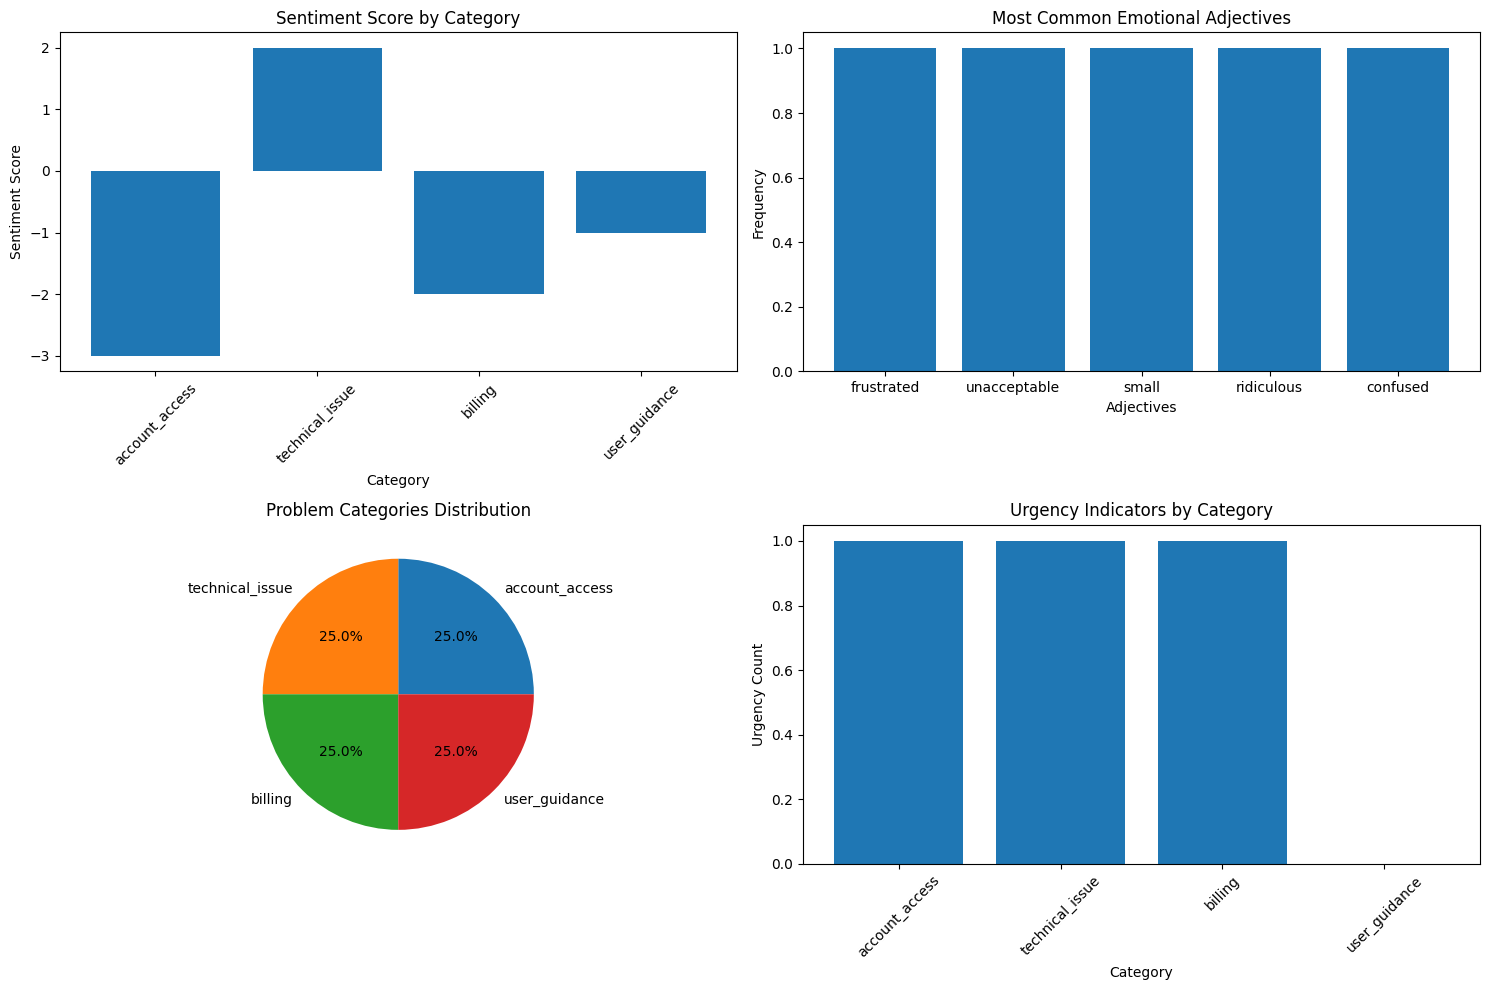

In [16]:

# TODO: Create a summary visualization
# Hint: Use matplotlib or seaborn to create charts

import matplotlib.pyplot as plt
import pandas as pd

# Convert results to DataFrame for easier analysis
df = pd.DataFrame(analysis_results)

# TODO: Create visualizations
# 1. Sentiment scores by category
# 2. Most common emotional adjectives
# 3. Action verbs frequency

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TODO: Plot 1 - Sentiment by category
axes[0, 0].bar(df['category'], df['sentiment_score'])
axes[0, 0].set_title('Sentiment Score by Category')
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Sentiment Score')
axes[0, 0].tick_params(axis='x', rotation=45)

# TODO: Plot 2 - Word frequency analysis
all_emotional_words = [word for sublist in df['emotional_adjectives'] for word in sublist]
word_counts = Counter(all_emotional_words)
if word_counts:
    words, counts = zip(*word_counts.most_common(5))
    axes[0, 1].bar(words, counts)
    axes[0, 1].set_title('Most Common Emotional Adjectives')
    axes[0, 1].set_xlabel('Adjectives')
    axes[0, 1].set_ylabel('Frequency')

# TODO: Plot 3 - Problem categorization
category_counts = df['category'].value_counts()
axes[1, 0].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
axes[1, 0].set_title('Problem Categories Distribution')

# TODO: Plot 4 - Urgency analysis
axes[1, 1].bar(df['category'], df['urgency_indicators'])
axes[1, 1].set_title('Urgency Indicators by Category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Urgency Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



### 💼 Business Impact Questions:
1. How could this analysis help prioritize customer service tickets? When we analyze urgency and sentiment of each ticket, customer service teams can prioritize tickets that require immediate attention, those with high urgency scores or negative sentiment could be an example. It can also help with categorization of issues therefore we can allocate teams more effectively. 
2. What patterns do you notice in different problem categories?There are usual things like account access issues which often involves words like - login, password, locked etc. Of course technical issues which are plentiful and includes words like - crash, bug, fix etc. Also billing issues that are know to all of us, word like charge, bill, refund, payment indicate this category. 
3. How might you automate the routing of calls based on POS analysis?
4. What are the limitations of this approach? Well first that comes to my mind is accuracy of NLP models as discussed above as they may not always accurately interpret informal language, slang etc. Also context is challenging, especially the full context of the conversation. Another highlights would be data privacy and security which goes hand in hand with Biases in models that are in training data which may lead to unfair or biased outcomes. Continuing on language complexity, ambiguity is challenging, if customers use sarcasm models may not interpret it correctly. From the business perspective it may not always be easy to integrate in the current processes and systems that company might be using. 



## ⚡ Lab Exercise 3: Tagger Performance Benchmarking (20 minutes)

Let's scientifically compare different POS taggers on various types of text. This will help you understand when to use which tool.



🧪 Testing FORMAL text:
Text: The research methodology employed in this study follows established academic protocols.
------------------------------------------------------------
NLTK Penn time: 0.0008s
NLTK Univ time: 0.0004s
SpaCy time: 0.0071s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing INFORMAL text:
Text: lol this study is kinda weird but whatever works i guess 🤷‍♀️
------------------------------------------------------------
NLTK Penn time: 0.0014s
NLTK Univ time: 0.0005s
SpaCy time: 0.0070s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing TECHNICAL text:
Text: The API returns a JSON response with HTTP status code 200 upon successful authentication.
------------------------------------------------------------
NLTK Penn time: 0.0006s
NLTK Univ time: 0.0003s
SpaCy time: 0.0045s
NLTK unknown words: 0
SpaCy unknown words: 0

🧪 Testing CONVERSATIONAL text:
Text: So like, when you click that button thingy, it should totally work, right?
------------------------------

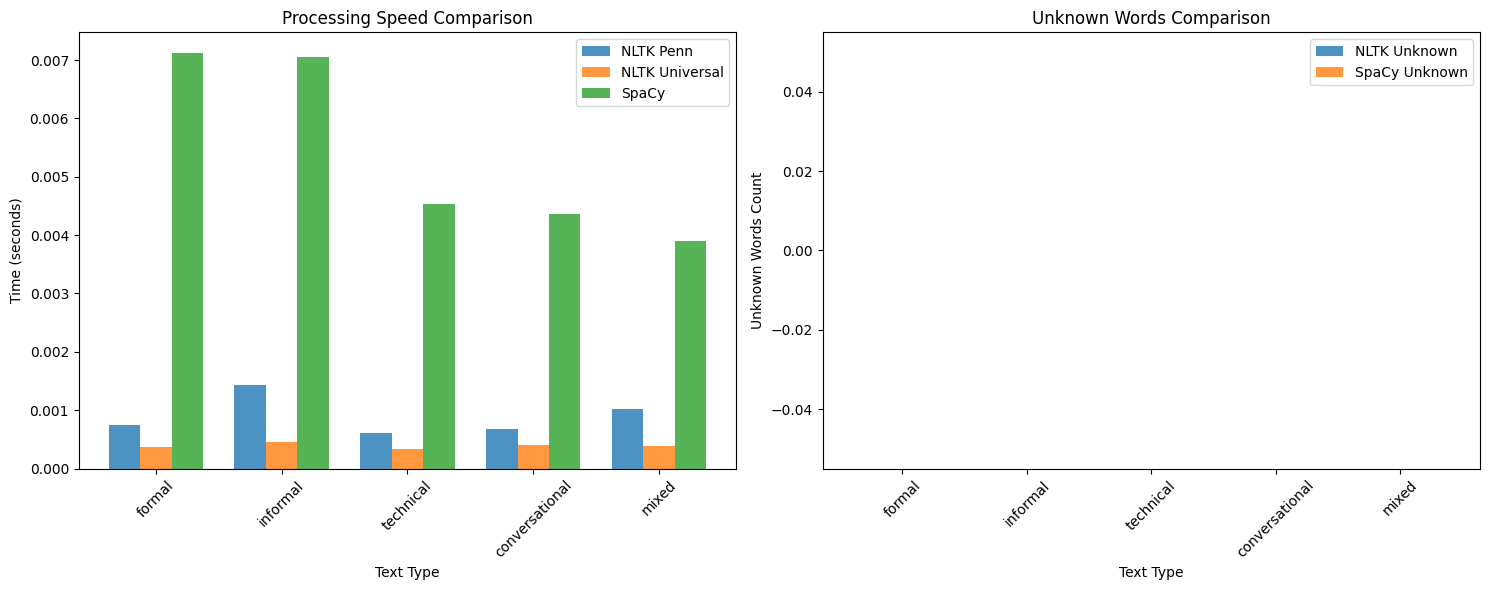

In [17]:

import time
from collections import defaultdict

# Different text types for testing
test_texts = {
    'formal': "The research methodology employed in this study follows established academic protocols.",
    'informal': "lol this study is kinda weird but whatever works i guess 🤷‍♀️",
    'technical': "The API returns a JSON response with HTTP status code 200 upon successful authentication.",
    'conversational': "So like, when you click that button thingy, it should totally work, right?",
    'mixed': "OMG the algorithm's performance is absolutely terrible! The accuracy dropped to 23% wtf"
}

# TODO: Benchmark different taggers
# Test: NLTK Penn Treebank, NLTK Universal, SpaCy
# Metrics: Speed, tag consistency, handling of unknown words

benchmark_results = defaultdict(list)

for text_type, text in test_texts.items():
    print(f"\n🧪 Testing {text_type.upper()} text:")
    print(f"Text: {text}")
    print("-" * 60)

    # TODO: NLTK Penn Treebank timing
    start_time = time.time()
    nltk_penn_tags = nltk.pos_tag(nltk.word_tokenize(text))
    nltk_penn_time = time.time() - start_time

    # TODO: NLTK Universal timing
    start_time = time.time()
    nltk_univ_tags = nltk.pos_tag(nltk.word_tokenize(text), tagset='universal')
    nltk_univ_time = time.time() - start_time

    # TODO: SpaCy timing
    start_time = time.time()
    spacy_doc = nlp(text)
    spacy_time = time.time() - start_time

    # TODO: Count unknown/problematic tags
    nltk_unknown = len([word for word, tag in nltk_penn_tags if tag in ['X', 'FW', 'UH']])
    spacy_unknown = len([token for token in spacy_doc if token.pos_ in ['X', 'SYM']])

    # Store results
    benchmark_results[text_type] = {
        'nltk_penn_time': nltk_penn_time,
        'nltk_univ_time': nltk_univ_time,
        'spacy_time': spacy_time,
        'nltk_unknown': nltk_unknown,
        'spacy_unknown': spacy_unknown
    }

    print(f"NLTK Penn time: {nltk_penn_time:.4f}s")
    print(f"NLTK Univ time: {nltk_univ_time:.4f}s")
    print(f"SpaCy time: {spacy_time:.4f}s")
    print(f"NLTK unknown words: {nltk_unknown}")
    print(f"SpaCy unknown words: {spacy_unknown}")

# TODO: Create performance comparison visualization
# Create comparison charts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Speed comparison
text_types = list(benchmark_results.keys())
nltk_penn_times = [benchmark_results[t]['nltk_penn_time'] for t in text_types]
nltk_univ_times = [benchmark_results[t]['nltk_univ_time'] for t in text_types]
spacy_times = [benchmark_results[t]['spacy_time'] for t in text_types]

x = range(len(text_types))
width = 0.25

axes[0].bar([i - width for i in x], nltk_penn_times, width, label='NLTK Penn', alpha=0.8)
axes[0].bar(x, nltk_univ_times, width, label='NLTK Universal', alpha=0.8)
axes[0].bar([i + width for i in x], spacy_times, width, label='SpaCy', alpha=0.8)

axes[0].set_xlabel('Text Type')
axes[0].set_ylabel('Time (seconds)')
axes[0].set_title('Processing Speed Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(text_types, rotation=45)
axes[0].legend()

# Accuracy comparison (unknown words)
nltk_unknowns = [benchmark_results[t]['nltk_unknown'] for t in text_types]
spacy_unknowns = [benchmark_results[t]['spacy_unknown'] for t in text_types]

axes[1].bar([i - 0.2 for i in x], nltk_unknowns, 0.4, label='NLTK Unknown', alpha=0.8)
axes[1].bar([i + 0.2 for i in x], spacy_unknowns, 0.4, label='SpaCy Unknown', alpha=0.8)

axes[1].set_xlabel('Text Type')
axes[1].set_ylabel('Unknown Words Count')
axes[1].set_title('Unknown Words Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(text_types, rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()



### 📊 Performance Analysis:
1. Which tagger is fastest? Does speed matter for your use case?NLTK Universal is consistently the quickest across all types of text (as low as 0.0003 seconds per sentence). If we are processing thousands of short texts then speed definitely matters therefore NLTK Universal is a great choice. If we are conducting a more detailed analysis and have a manageable number of documents, a slightly slower tagger such as SpaCy can be acceptable and might be worth using for improved context understanding.
2. Which handles informal text best? Based on my observation - All taggers had 0 unknown words, even in informal sentences. But above in other cases SpaCy generally performs better with slang, emojis, contractions. 
3. How do the taggers compare on technical jargon? All taggers showed 0 unknowns in all. As I understood SpaCy has been trained on web and software documentation therefore I assume it handles it better. 
4. What trade-offs do you see between speed and accuracy? I would use SpaCy if I would need better contextual awareness and more modern NLP support as oppose to NLTK Universal where I would need fast POS tagging for high-volume, clean text.



## 🚨 Lab Exercise 4: Edge Cases and Error Analysis (15 minutes)

Every system has limitations. Let's explore the edge cases where POS taggers struggle and understand why.


In [18]:

# Challenging edge cases
edge_cases = [
    "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.",  # Famous ambiguous sentence
    "Time flies like an arrow; fruit flies like a banana.",              # Classic ambiguity
    "The man the boat the river.",                                       # Garden path sentence
    "Police police Police police police police Police police.",          # Recursive structure
    "James while John had had had had had had had had had had had a better effect on the teacher.",  # Had had had...
    "Can can can can can can can can can can.",                         # Modal/noun ambiguity
    "@username #hashtag http://bit.ly/abc123 😂🔥💯",                   # Social media elements
    "COVID-19 AI/ML IoT APIs RESTful microservices",                    # Modern technical terms
]

print("🚨 EDGE CASE ANALYSIS")
print("=" * 50)

# TODO: Process each edge case and analyze failures
for i, text in enumerate(edge_cases, 1):
    print(f"\n🔍 Edge Case {i}:")
    print(f"Text: {text}")
    print("-" * 30)

    try:
        # TODO: Process with both taggers
        nltk_tags = nltk.pos_tag(nltk.word_tokenize(text))
        spacy_doc = nlp(text)

        # TODO: Identify potential errors or weird tags
        # Look for: repeated tags, unusual patterns, X tags, etc.

        print("NLTK tags:", [(w, t) for w, t in nltk_tags])
        print("SpaCy tags:", [(token.text, token.pos_) for token in spacy_doc])

        # TODO: Analyze what went wrong
        # Count unusual patterns
        nltk_tag_counts = Counter([tag for _, tag in nltk_tags])
        spacy_tag_counts = Counter([token.pos_ for token in spacy_doc])
        
        unusual_nltk = [tag for tag, count in nltk_tag_counts.items() if count > 3]
        unusual_spacy = [tag for tag, count in spacy_tag_counts.items() if count > 3]
        
        if unusual_nltk:
            print(f"NLTK unusual repeated tags: {unusual_nltk}")
        if unusual_spacy:
            print(f"SpaCy unusual repeated tags: {unusual_spacy}")

    except Exception as e:
        print(f"❌ Error processing: {e}")

# TODO: Reflection on limitations
print("\n🤔 REFLECTION ON LIMITATIONS:")
print("=" * 40)
print("Common issues observed:")
print("1. Repeated identical words confuse both taggers")
print("2. Garden path sentences cause incorrect parsing")
print("3. Social media elements (emojis, hashtags) are often tagged as symbols")
print("4. Technical terms may be tagged as proper nouns or unknown")
print("5. Context is crucial - taggers struggle with highly ambiguous sentences")
print("6. Both systems rely on statistical patterns from training data")


🚨 EDGE CASE ANALYSIS

🔍 Edge Case 1:
Text: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo.
------------------------------
NLTK tags: [('Buffalo', 'NNP'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('buffalo', 'NN'), ('Buffalo', 'NNP'), ('buffalo', 'NN'), ('.', '.')]
SpaCy tags: [('Buffalo', 'PROPN'), ('buffalo', 'NOUN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('Buffalo', 'PROPN'), ('buffalo', 'PROPN'), ('.', 'PUNCT')]
NLTK unusual repeated tags: ['NN']
SpaCy unusual repeated tags: ['PROPN']

🔍 Edge Case 2:
Text: Time flies like an arrow; fruit flies like a banana.
------------------------------
NLTK tags: [('Time', 'NNP'), ('flies', 'NNS'), ('like', 'IN'), ('an', 'DT'), ('arrow', 'NN'), (';', ':'), ('fruit', 'CC'), ('flies', 'NNS'), ('like', 'IN'), ('a', 'DT'), ('banana', 'NN'), ('.', '.')]
SpaCy tags: [('Time', 'NOUN'), ('flies', 'VERB'), ('like', 'ADP'), ('an', 'DET'), ('arrow', 'NOUN'


### 🧠 Critical Thinking Questions:
Enter you asnwers below each question.
1. Why do these edge cases break the taggers?
These edge cases confuse standard taggers because they depend heavily on statistical patterns, fixed grammars, and local context. As an example, look at these ambiguous structures -like “Buffalo buffalo..." or "Police police...", cause confusion for the model because the same words serve different functions such as noun or verb.
2. How might you preprocess text to handle some of these issues?
We could start with normalizing casing - lowercasing all words, expand contractions, inject the domain specific vocabulary based on the themes, maybe use custom tokenization so there is standardized way how to handle symbols, links etc. 

3. When would these limitations matter in real applications?
These constraints become especially important in scenarios that require precise accuracy, nuanced understanding, or interpreting informal and complex inputs. As an HR professional example could be in resume parsing and candidate screening, sentiment analysis of employee satisfaction survey, policy compliance analysis etc. POS tagging errors and NLP limitations can significantly impact all these key process in HR. 

4. How do modern large language models handle these cases differently?
Modern LLMs use deep contextual understanding, considering the entire sentence or paragraph, not just local context. They’re pretrained on large, diverse datasets, including web text, code, and social media, allowing them to encounter a wide range of linguistic variations. They don’t just tag words, they actually “understand” their context, making them much more reliable in edge cases.
---



## 🎯 Final Reflection and Submission

Congratulations! You've completed a comprehensive exploration of POS tagging, from basic concepts to real-world challenges.

### 📝 Reflection Questions (Answer in the cell below):

1. **Tool Comparison**: Based on your experience, when would you choose NLTK vs SpaCy? Consider factors like ease of use, accuracy, speed, and application type.
For quick, lightweight tasks or teaching, I would opt for NLTK because of its simplicity and speed. However, for real-world applications that demand higher accuracy, better context understanding, or support for modern language patterns, I would prefer SpaCy. 

2. **Real-World Applications**: Describe a specific business problem where POS tagging would be valuable. How would you implement it?
In HR, POS tagging can assist in analyzing employee feedback surveys. For instance, highlighting common verbs associated with negative experiences (“ignored,” “micromanaged”) might reveal leadership problems. I would achieve this by integrating POS tagging with keyword filtering and sentiment analysis.

3. **Limitations and Solutions**: What are the biggest limitations you discovered? How might you work around them?
The main limitations include ambiguous word roles, difficulties with informal or technical language, and inconsistent handling of edge cases. I would address these issues by employing domain-specific dictionaries, implementing preprocessing rules, or adopting contextual models.

4. **Future Learning**: What aspects of POS tagging would you like to explore further? (Neural approaches, custom training, domain adaptation, etc.)
I would want to explore neural methods like transformer-based POS tagging and custom training for HR-specific text to enhance accuracy in real-world use.
5. **Integration**: How does POS tagging fit into larger NLP pipelines? What other NLP tasks might benefit from POS information?
POS tagging is a fundamental component of NLP pipelines, aiding named entity recognition, dependency parsing, and text classification. It enhances information extraction and comprehension of sentence structure in applications such as summarization or chatbot development.



### ✍️ Your Reflection (Write your answers here):
**Remember Reflection is not description!**

**1. Tool Comparison:**
I realized that while NLTK is quick and easy to get started with, SpaCy offers better performance in real-world scenarios, especially for messy or informal text. Choosing between them depends on the task’s complexity and the need for accuracy.

**2. Real-World Applications:**
POS tagging can assist HR in analyzing feedback and survey responses to identify common employee pain points. It’s more than automation as it’s about revealing patterns that might go unnoticed during manual reviews.

**3. Limitations and Solutions:**
Taggers face challenges with ambiguity, repetition, and domain-specific jargon. I would address this by combining preprocessing, domain tuning, and possibly switching to models that understand context, such as transformers.

**4. Future Learning:**
I'm interested in exploring neural methods, particularly fine-tuning POS taggers on industry-specific texts like HR policies, feedback, or resumes, to boost accuracy and relevance.

**5. Integration:**
POS tagging serves as a fundamental element in NLP pipelines and works seamlessly with tools such as SpaCy or NLTK for tasks like dependency parsing, named entity recognition, or text classification. It assists other components in understanding sentence structure, which enhances the effectiveness of tools like chatbots, search engines, and HR analytics platforms.



---

## 📤 Submission Checklist

Before submitting your completed notebook, make sure you have:

- [ ] ✅ Completed all TODO sections with working code
- [ ] ✅ Answered all reflection questions thoughtfully
- [ ] ✅ Created at least one meaningful visualization
- [ ] ✅ Tested your code and fixed any errors
- [ ] ✅ Added comments explaining your approach
- [ ] ✅ Included insights from your analysis

### 📋 Submission Instructions:
1. **Save your notebook**: File → Save (or Ctrl+S)
2. **Download**: File → Download → Download .ipynb
3. **Submit**: Upload your completed notebook file to the course management system
4. **Filename**: Use format: `L05_LastName_FirstName_ITAI2373.ipynb or pdf`  

### 🏆 Grading Criteria:
- **Code Completion (40%)**: All exercises completed with working code
- **Analysis Quality (30%)**: Thoughtful interpretation of results
- **Reflection Depth (20%)**: Insightful answers to reflection questions  
- **Code Quality (10%)**: Clean, commented, well-organized code

---

## 🎉 Great Work!

You've successfully explored the fascinating world of POS tagging! You now understand how computers parse human language and can apply these techniques to solve real-world problems.


Keep exploring and happy coding! 🚀
